In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pylab as plt
import EMEP4UK_tools as EMTs

from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (20.,10)


In [2]:
EMEP_DIR='/users/eow/edwcom/EMEP/'
infile=EMEP_DIR+'EMEP_EuroBVOC.nc'
LCfile=EMEP_DIR+'EMEP4UK/JULES_ancils/EMEP4UK_EUROPE_Landuse.nc'

In [3]:
print(LCfile)
LCinf=nc.Dataset(LCfile,'r')
LCs=['CF','DF','NF','BF']
LCdata= [ LCinf.variables[LC][:] for LC in LCs ]
LClats=LCinf.variables['lat'][:]
LClons=LCinf.variables['lon'][:]
LCi=LCinf.variables['i_EMEP'][:]
LCj=LCinf.variables['j_EMEP'][:]
LCinf.close()
for iLC in range(4):
    print(LCs[iLC],LCdata[iLC].shape)

/users/eow/edwcom/EMEP/EMEP4UK/JULES_ancils/EMEP4UK_EUROPE_Landuse.nc
CF (133, 170)
DF (133, 170)
NF (133, 170)
BF (133, 170)


In [4]:
DataDict={}
inf=nc.Dataset(infile,'r')
for var in inf.variables:
    DataDict[var]=inf.variables[var][:]
inf.close()

In [5]:
for var in DataDict:
    print(var,DataDict[var].shape)
    

SumArea (110, 153)
Emt_CF (110, 153)
Emt_BF (110, 153)
lat (110, 153)
Emtl_DF (110, 153)
Emtl_NF (110, 153)
Emtl_CF (110, 153)
Eiso_CF (110, 153)
lon (110, 153)
Emt_DF (110, 153)
Eiso_NF (110, 153)
XYinfo (110, 153)
Eiso_BF (110, 153)
Emt_NF (110, 153)
Eiso_DF (110, 153)
Emtl_BF (110, 153)


In [6]:
EF_i,EF_j = np.round( EMTs.lonlat_to_xy(DataDict['lon'],DataDict['lat']) )

EF_i=EF_i[0,:]
EF_j=EF_j[:,0]

#print(DataDict['lon'][-1,-1], DataDict['lat'][-1,-1])
#print(LClons[-1,-1],LClats[-1,-1])

In [7]:
#plt.imshow(LCdata[3],origin='bottom')
#for LCdat in LCdata:
#    print(LCdat.shape)

In [8]:
EU_ll = [ np.where(LCj==EF_j[0])[0], np.where(LCi==EF_i[0])[0] ]
EU_ur = [ np.where(LCj==EF_j[-1])[0], np.where(LCi==EF_i[-1])[0] ]

print(EU_ll)
print(EU_ur)

LCdata= [ LCdat[EU_ll[0]:EU_ur[0]+1,EU_ll[1]:EU_ur[1]+1] for LCdat in LCdata ]

[array([0]), array([0])]
[array([109]), array([152])]


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:3172: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]


In [9]:
#plt.imshow(LCdata[3],origin='bottom')
for LCdat in LCdata:
    print(LCdat.shape)

(110, 153)
(110, 153)
(110, 153)
(110, 153)


In [10]:
UK_pt_lims = [(42,65),(69,88)]
UK_LCdata = [ LCdat[UK_pt_lims[0][0]:UK_pt_lims[0][1],\
                    UK_pt_lims[1][0]:UK_pt_lims[1][1] ] \
              for LCdat in LCdata]

[250.0, 93.75, 250.0, 93.75]
Eiso_CF  - Mean (EU) = 1.91017436304
 - Mean (EU-indexed) = 1.40229141003
         - Mean (UK) = 8.41797210973
 - Mean (UK-indexed) = 10.8451708625
Eiso_DF  - Mean (EU) = 41.4968429361
 - Mean (EU-indexed) = 41.6222563244
         - Mean (UK) = 48.7933539994
 - Mean (UK-indexed) = 82.5114135742
Eiso_NF  - Mean (EU) = 0.931273482718
 - Mean (EU-indexed) = 3.13734283447
         - Mean (UK) = 0.0823594539537
 - Mean (UK-indexed) = --
Eiso_BF  - Mean (EU) = 0.198407356565
 - Mean (EU-indexed) = 0.270624751136
         - Mean (UK) = 0.106559998399
 - Mean (UK-indexed) = --
  


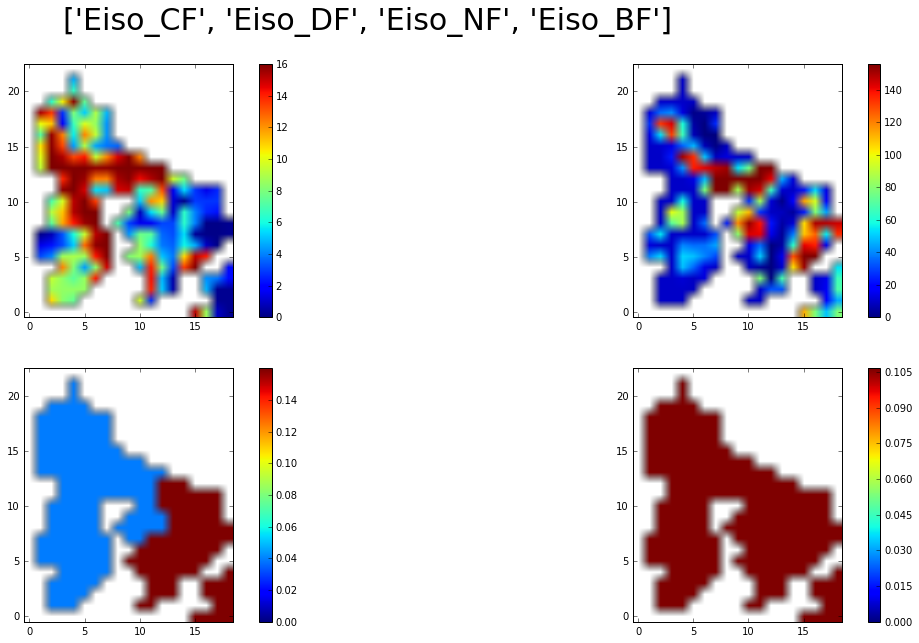

Emtl_CF  - Mean (EU) = 1.30072035936
 - Mean (EU-indexed) = 1.48626227794
         - Mean (UK) = 0.774155223041
 - Mean (UK-indexed) = 0.632990556605
Emtl_DF  - Mean (EU) = 3.43512372361
 - Mean (EU-indexed) = 5.52335880266
         - Mean (UK) = 5.41175716295
 - Mean (UK-indexed) = 9.19069290161
Emtl_NF  - Mean (EU) = 0.140756319523
 - Mean (EU-indexed) = 0.206078842708
         - Mean (UK) = 0.0399599993994
 - Mean (UK-indexed) = --
Emtl_BF  - Mean (EU) = 28.171507087
 - Mean (EU-indexed) = 43.4279901414
         - Mean (UK) = 0.106559998399
 - Mean (UK-indexed) = --
  


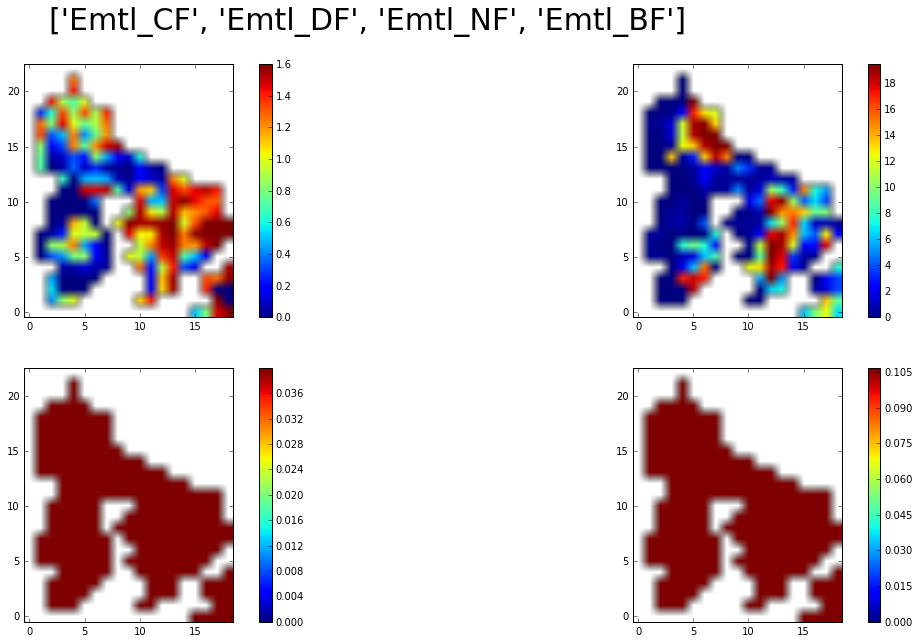

Emt_CF  - Mean (EU) = 6.19749068913
 - Mean (EU-indexed) = 5.76941373833
         - Mean (UK) = 11.2113989034
 - Mean (UK-indexed) = 12.5923129811
Emt_DF  - Mean (EU) = 3.55065304566
 - Mean (EU-indexed) = 2.87471315712
         - Mean (UK) = 0.628060717101
 - Mean (UK-indexed) = 0.522533297539
Emt_NF  - Mean (EU) = 4.4151189654
 - Mean (EU-indexed) = 6.76017586844
         - Mean (UK) = 2.17092279557
 - Mean (UK-indexed) = --
Emt_BF  - Mean (EU) = 0.509406640008
 - Mean (EU-indexed) = 0.499145416986
         - Mean (UK) = 0.106559998399
 - Mean (UK-indexed) = --
  


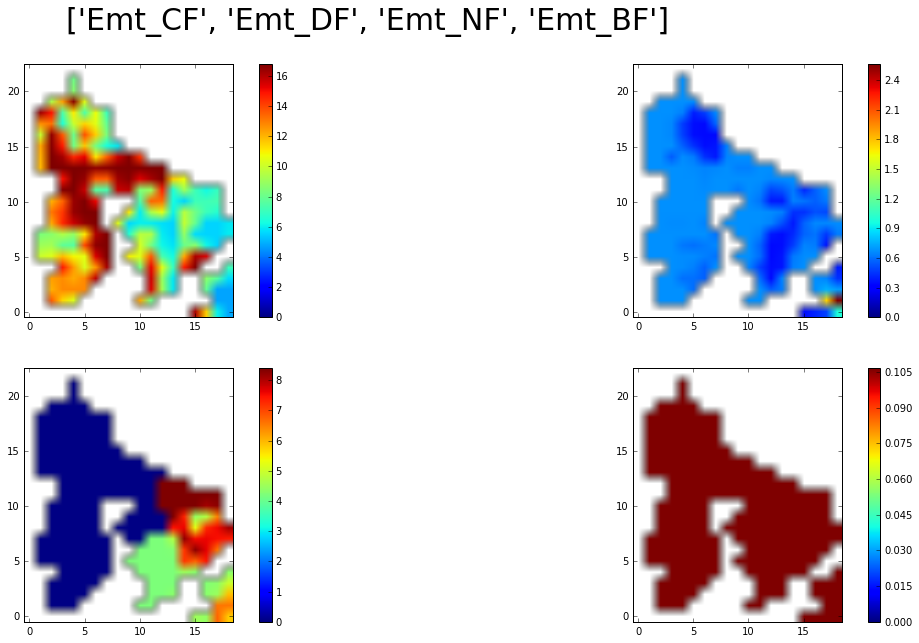

In [11]:
plotvars=[ ['Eiso_CF','Eiso_DF','Eiso_NF','Eiso_BF'], \
           ['Emtl_CF','Emtl_DF','Emtl_NF','Emtl_BF'], \
           ['Emt_CF','Emt_DF','Emt_NF','Emt_BF'],     \
          ]

# Densities quoted in Simpson et al EMEP paper
#D_fac=[1000.,320.,500.,300.]

# Density calculated by inverting the JULES methodology in bvoc_emissions.F90
#  i.e. BER = ief * dw_area; dw_area= (sigl*1e3/cmass)
#   therefore: ief = BER/dw_area

sigl_JULES=[0.1,0.0375,0.1,0.0375]
D_fac_JULES= [ (sigl*1e3)/0.4 for sigl in sigl_JULES ]
D_fac = D_fac_JULES

print(D_fac_JULES)

for pvars in plotvars:
    for iplt in range(4):
        plt.subplot(2,2,iplt+1)
        EUdata=DataDict[pvars[iplt]]/D_fac[iplt]
        EUindex=LCdata[iplt]>0.1
        UKdata=EUdata[UK_pt_lims[0][0]:UK_pt_lims[0][1],\
                      UK_pt_lims[1][0]:UK_pt_lims[1][1] ]
        UKindex=UK_LCdata[iplt]>0.1
        print(pvars[iplt]+'  - Mean (EU) = '+str(np.mean(EUdata)))
        print(' - Mean (EU-indexed) = '+str(np.mean(EUdata[EUindex])))
        
        print('         - Mean (UK) = '+str(np.mean(UKdata)))
        print(' - Mean (UK-indexed) = '+str(np.mean(UKdata[UKindex])))
        
        plt.imshow(UKdata,origin='bottom', vmin=0)
        plt.colorbar()
        plt.ylabel=str(pvars[iplt])
    print('  ')
        
        
    plt.suptitle(str(pvars),fontsize=30)
    plt.show()
        